In [1]:
#!pip install pydot
#!pip install pydot-ng
#!pip install graphviz
#!pip install --upgrade scikit-learn==0.20.3
#!pip install six

In [2]:
"""
You cannot have a forest if you do not have trees!!
Will start out with one basic tree whether classification or regression
you can use each algorithm to do both classification or regression
the pattern we are going to follow is to visualize how the tree looks (binary seperation)
have one a branch splits into two and continue to split to accomdate each feature of our data set
then eventually come to a conclusive predictin or classification

A decision tree is a binary tree which is a way to split every feature of our data set
(aka every column) into one or two branches, the tree will find the patterns itself
we can manipulate but we cannot tell the tree how to split it
eventaully will lead to predictions or classifications base on the patterns it found

In random forest the process expands because you have hundreds of trees
depending on the data set the bigger the more trees aka nodes will be required

A node is the circle that splits into two nodes(branches) etc. 
one you see three brances it is no longer a binary tree
every node with two brances is a tree

in random forest the probability of each tree is summed up and used
for the prediction or classification
"""

'\nYou cannot have a forest if you do not have trees!!\nWill start out with one basic tree whether classification or regression\nyou can use each algorithm to do both classification or regression\nthe pattern we are going to follow is to visualize how the tree looks (binary seperation)\nhave one a branch splits into two and continue to split to accomdate each feature of our data set\nthen eventually come to a conclusive predictin or classification\n\nA decision tree is a binary tree which is a way to split every feature of our data set\n(aka every column) into one or two branches, the tree will find the patterns itself\nwe can manipulate but we cannot tell the tree how to split it\neventaully will lead to predictions or classifications base on the patterns it found\n\nIn random forest the process expands because you have hundreds of trees\ndepending on the data set the bigger the more trees aka nodes will be required\n\nA node is the circle that splits into two nodes(branches) etc. \no

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# libraries we are going to use for ML
from sklearn.model_selection import train_test_split # standard
from sklearn.tree import DecisionTreeClassifier # for decision tree
from sklearn.ensemble import RandomForestClassifier # for random forest
from sklearn.metrics import classification_report, confusion_matrix # classication report

from IPython.display import Image # allows to paint picture
from six import StringIO # allows to pin picture
from sklearn.tree import export_graphviz # export jpeg file etc.
import pydot

sns.set()

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/kyphosis.csv')

In [5]:
# create an algorithm that can tell us given the description of a new person (age)
# what is the probability for that person to develop such condition (Kyphosis)
# Target is what do you want to achieve?
# In supervised learning the data is always going to have a target
# the a column with yes or no or 0 or 1
# in this case the Kyphosis column abset or present
# training the algorithm to learn this so we can use new data to predict or classify
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

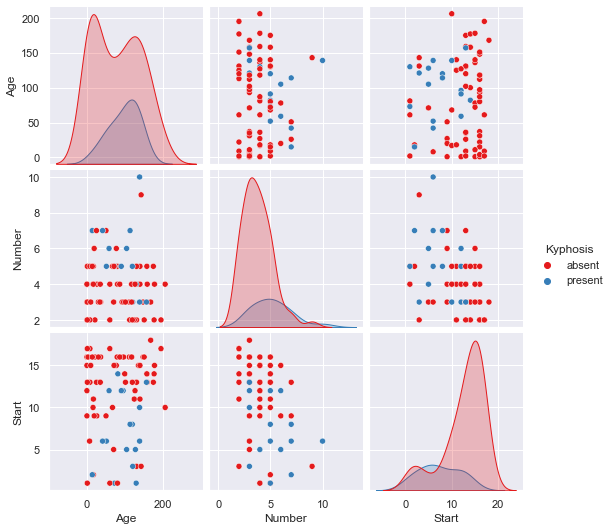

In [8]:
# every column of the dataset vs every column of the dataset
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [9]:
# chose our x and y variables
# for X the whole dataset except the target column 'Kyphosis'
# x always contain every column except the target column
X = df.drop('Kyphosis', axis = 1) 
# target column
# y is what we trying to predict
y = df['Kyphosis']

In [10]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [11]:
# choose ML with imported classifier
dtree = DecisionTreeClassifier()

In [12]:
# train the model
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
predictions = dtree.predict(X_test)

In [14]:
# Acquiring the accruary of our model
# Interested in the model because we did not create the models
# we pulled them from the libary
# we can only fine tune the accuracy by manipulating the data, test size, random, seed
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

    accuracy                           0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25



In [15]:
print(confusion_matrix(y_test,predictions))

[[18  2]
 [ 4  1]]


In [16]:
# to see the decision tree itself
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [17]:
# List of our features all our columns till the end
# Slicing starting at position 1 which is Age till the end
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

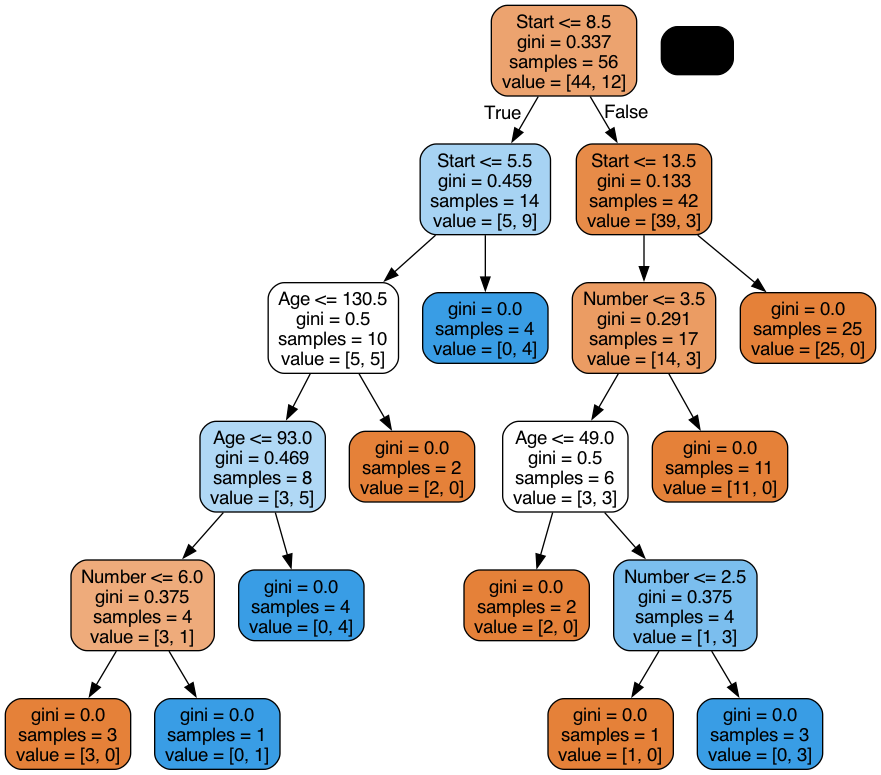

In [24]:
dot_data = StringIO() # canvas
# put the graphic in a place
# bring in the tree = dtree
# where do we want to put it on the canvas we created = out_file=dot_data
# name the features of the tree itself or data set = feature_names = features
# fill it in with color = filled = True
export_graphviz(dtree, out_file=dot_data, feature_names = features, filled = True, rounded = True)

# create a new variable which will draw the graph in from the graph_from_dot_data lib
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# no control of color scheme
# binary tree or probability tree
# what does gini do?
# it calculates the probability of a certain randomly selected feature that was classified incorrectly 

In [25]:
# since we have a tree do not need to start over
# n_estimators = the amount of trees
rfc = RandomForestClassifier(n_estimators = 500)
# train the model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [26]:
# test the model
rfc_pred = rfc.predict(X_test)

In [27]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      1.00      0.91        20
     present       1.00      0.20      0.33         5

    accuracy                           0.84        25
   macro avg       0.92      0.60      0.62        25
weighted avg       0.87      0.84      0.79        25

